In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox ## z-transformation // standard scaler 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

# Load data 

In [2]:
ca_df= pd.read_csv ("data/Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
ca_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [4]:
#ca_df['effective_to_date'] = pd.to_datetime(ca_df['effective_to_date'])
#ca_df = ca_df.drop('month', axis=1)

In [5]:
ca_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


# Load 3rd Party Data

[Motor Vehicle Regristration 2011](https://www.bts.gov/archive/publications/state_transportation_statistics/state_transportation_statistics_2012/table_05_01)

In [6]:
mo_reg= pd.read_csv ("data/table_05-01.csv")
mo_reg

,Table 5-1: Motor-Vehicle Registrations: 2011,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,(Thousands),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Private and commercial,NaN,NaN,NaN,Partial classification of trucks1,NaN,NaN,NaN,NaN,NaN
2,State,Auto-mobiles,Motor-cycles,Buses,Trucks,Truck tractors,Pickups,Vans,Sport utilities,Other light3,NaN
3,Alabama,"2,283",127,3,"2,330",38,"1,050",839,243,38,NaN
4,Alaska,211,31,2,499,5,216,188,49,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
58,4State did not report active registrations and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,5State did not report current year data. Previ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,"SOURCE: U.S. Department of Transportation, Fed...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[Unemployment Rate 2011](https://fred.stlouisfed.org/series/UNRATE)

In [7]:
unrate= pd.read_csv ("data/UNRATE.csv")
unrate

,DATE,UNRATE
0,2011-01-01,9.1
1,2011-02-01,9.0
2,2011-03-01,9.0
3,2011-04-01,9.1
4,2011-05-01,9.0
5,2011-06-01,9.1
6,2011-07-01,9.0


[USA State Region Mapping Table](https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv)

In [8]:
state_region_map = pd.read_csv ("data/us census bureau regions and divisions.csv")
state_region_map

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
...,...,...,...,...
46,Vermont,VT,Northeast,New England
47,Washington,WA,West,Pacific
48,Wisconsin,WI,Midwest,East North Central
49,West Virginia,WV,South,South Atlantic


In [9]:
#ca_df = ca_df.sort_values('effective_to_date')
#unrate = unrate.sort_values('DATE')

#unrate['DATE'] = pd.to_datetime(unrate['DATE'])
#ca_df['DATE'] = ca_df['effective_to_date']

In [10]:
#ca_df = pd.merge_asof(ca_df, unrate, on='DATE')
#print (ca_df)

In [11]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

# Cleaning data 

## All those steps where did before 
- 1 Standardize column names
- 2 Deleting and rearranging columns
- 3 Working with data types (set the correct type)
- 4 Filtering data
- 5 Removing duplicates
- 6 Correcting typos
- 7 Conditional formatting
- 8 Replace missing values


# Split df to numerical and categorical features 

In [12]:
ca_numerical=ca_df._get_numeric_data()
ca_categorical=ca_df.select_dtypes(include=["object"])

ca_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [13]:
ca_categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [14]:
ca_numerical.drop(columns=["number_of_open_complaints"],axis=1, inplace=True)
ca_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,9,292
1,2228,92260,64,3,26,1,744
2,14947,22139,100,34,31,2,480
3,22332,49078,97,10,3,2,484
4,9025,23675,117,33,31,7,707
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,1214
10685,5259,61146,65,7,68,6,273
10686,23893,39837,201,11,63,2,381
10687,11971,64195,158,0,27,6,618


In [15]:
l= ca_df["number_of_open_complaints"]
ca_categorical.insert(0, "number_of_open_complaints",l)

In [16]:
ca_categorical.drop(columns=["effective_to_date"],axis=1, inplace=True)

/Users/Gunnar/anaconda3/envs/IronhackDA/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
ca_categorical

,number_of_open_complaints,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,0,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,0,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,0,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,0,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,0,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,0,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,4,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


# Hot / Labeld  Encoding

## Labeld

- we are doing all ordinal features into a new df called ca_categorical_ordinal 

In [18]:
# labeled ordinal features 
# coverage
# education
# month
# policy 
ca_categorical_ordinal=pd.DataFrame(ca_categorical[["coverage", "education", "month", "policy"]])
ca_categorical_ordinal

,coverage,education,month,policy
0,basic,college,feb,corporate l3
1,basic,college,jan,personal l3
2,basic,bachelor,feb,personal l3
3,extended,college,jan,corporate l3
4,premium,bachelor,jan,personal l2
...,...,...,...,...
10684,premium,bachelor,jan,personal l1
10685,basic,college,jan,personal l3
10686,extended,bachelor,feb,corporate l3
10687,premium,college,feb,personal l1


In [19]:
ca_categorical_ordinal.coverage.value_counts()

basic       6523
extended    3206
premium      960
Name: coverage, dtype: int64

In [20]:
coverage={"basic":1,"extended":2,"premium":3}


In [21]:
ca_categorical_ordinal[["coverage"]]=ca_categorical_ordinal[["coverage"]].replace(coverage)
ca_categorical_ordinal

,coverage,education,month,policy
0,1,college,feb,corporate l3
1,1,college,jan,personal l3
2,1,bachelor,feb,personal l3
3,2,college,jan,corporate l3
4,3,bachelor,jan,personal l2
...,...,...,...,...
10684,3,bachelor,jan,personal l1
10685,1,college,jan,personal l3
10686,2,bachelor,feb,corporate l3
10687,3,college,feb,personal l1


In [22]:
ca_categorical_ordinal.education.value_counts()

bachelor                3210
college                 3141
high school or below    3076
master                   873
doctor                   389
Name: education, dtype: int64

In [23]:
education={"high school or below":1,"college":2,"bachelor":3, "master":4, "doctor":5}

In [24]:
ca_categorical_ordinal[["education"]]=ca_categorical_ordinal[["education"]].replace(education)
ca_categorical_ordinal

,coverage,education,month,policy
0,1,2,feb,corporate l3
1,1,2,jan,personal l3
2,1,3,feb,personal l3
3,2,2,jan,corporate l3
4,3,3,jan,personal l2
...,...,...,...,...
10684,3,3,jan,personal l1
10685,1,2,jan,personal l3
10686,2,3,feb,corporate l3
10687,3,2,feb,personal l1


In [25]:
ca_categorical_ordinal.month.value_counts()

jan    5684
feb    5005
Name: month, dtype: int64

In [26]:
month={"jan":1,"feb":2}

In [27]:
ca_categorical_ordinal[["month"]]=ca_categorical_ordinal[["month"]].replace(month)
ca_categorical_ordinal

,coverage,education,month,policy
0,1,2,2,corporate l3
1,1,2,1,personal l3
2,1,3,2,personal l3
3,2,2,1,corporate l3
4,3,3,1,personal l2
...,...,...,...,...
10684,3,3,1,personal l1
10685,1,2,1,personal l3
10686,2,3,2,corporate l3
10687,3,2,2,personal l1


In [28]:
ca_categorical_ordinal.policy.value_counts()

personal l3     4006
personal l2     2478
personal l1     1453
corporate l3    1199
corporate l2     684
corporate l1     429
special l2       192
special l3       170
special l1        78
Name: policy, dtype: int64

In [29]:
policy={"personal l3":1,"personal l1":1,"personal l2":1,"corporate l3":2,"corporate l2":2, "corporate l1":2,"speical l3":3,"speical l2":3,"speical l1":3}

In [30]:
ca_categorical_ordinal[["policy"]]=ca_categorical_ordinal[["policy"]].replace(policy)
ca_categorical_ordinal

,coverage,education,month,policy
0,1,2,2,2
1,1,2,1,1
2,1,3,2,1
3,2,2,1,2
4,3,3,1,1
...,...,...,...,...
10684,3,3,1,1
10685,1,2,1,1
10686,2,3,2,2
10687,3,2,2,1


## Hot 
- we will put all nominal features in a new df called ca_categorical_hot

In [31]:
ca_categorical.info() 
#region
#response
#employment_status
#gender
#location_code
#martial_status
#policy_type
#policy 
#sales_channel
#vehicle_class
#vehicle_size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   number_of_open_complaints  10689 non-null  int64 
 1   region                     10689 non-null  object
 2   response                   10689 non-null  object
 3   coverage                   10689 non-null  object
 4   education                  10689 non-null  object
 5   month                      10689 non-null  object
 6   employment_status          10689 non-null  object
 7   gender                     10689 non-null  object
 8   location_code              10689 non-null  object
 9   marital_status             10689 non-null  object
 10  policy_type                10689 non-null  object
 11  policy                     10689 non-null  object
 12  renew_offer_type           10689 non-null  object
 13  sales_channel              10689 non-null  object
 14  vehicl

In [32]:
ca_categorical.gender.value_counts()

f    5469
m    5220
Name: gender, dtype: int64

In [33]:
ca_categorical.response.value_counts()

no     9316
yes    1373
Name: response, dtype: int64

In [34]:
ca_categorical.sales_channel.value_counts()

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

In [35]:
ca_categorical.location_code.value_counts()

suburban    6742
rural       2086
urban       1861
Name: location_code, dtype: int64

In [36]:
ca_categorical.marital_status.value_counts()

married     6199
single      2910
divorced    1580
Name: marital_status, dtype: int64

In [37]:
ca_categorical.vehicle_size.value_counts()

medsize    7528
small      2049
large      1112
Name: vehicle_size, dtype: int64

In [38]:
ca_categorical.vehicle_class.value_counts()

four-door car    5424
two-door car     2185
suv              2103
sports car        565
luxury suv        213
luxury car        199
Name: vehicle_class, dtype: int64

In [39]:
ca_categorical.policy_type.value_counts()

personal auto     7937
corporate auto    2312
special auto       440
Name: policy_type, dtype: int64

In [40]:
#region
#response
#employment_status
#gender
#location_code
#martial_status
#policy_type
#policy 
#sales_channel
#vehicle_class
#vehicle_size

In [41]:
# all nominal features are getting hot encoded 
ca_categorical_hot=pd.get_dummies(ca_categorical[["region","response","gender","policy_type","employment_status","vehicle_class","vehicle_size","marital_status","location_code"]], drop_first=True)

In [42]:
ca_categorical_hot

,region_east,region_north west,region_west region,response_yes,gender_m,policy_type_personal auto,policy_type_special auto,employment_status_employed,employment_status_medical leave,employment_status_retired,...,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,1,0,0,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
3,0,1,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
10685,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
10686,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
10687,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


- now we can concateinate ca_categorical_hot and ca_categorical_ordinal

- then insert the number_of_open_complaints
- and renew_offer_type 
    - look that you need to cut the str "offer" and then change the numbers from str to int

In [43]:
categorical_features=pd.concat([ca_categorical_hot,ca_categorical_ordinal],axis=1)
categorical_features

,region_east,region_north west,region_west region,response_yes,gender_m,policy_type_personal auto,policy_type_special auto,employment_status_employed,employment_status_medical leave,employment_status_retired,...,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month,policy
0,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,1,2,2,2
1,0,0,1,0,0,1,0,0,0,0,...,1,0,0,1,1,0,1,2,1,1
2,1,0,0,0,1,1,0,1,0,0,...,1,0,0,1,1,0,1,3,2,1
3,0,1,0,1,1,0,0,1,0,0,...,1,0,0,1,1,0,2,2,1,2
4,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,1,0,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,3,3,1,1
10685,0,1,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,1,2,1,1
10686,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,2,3,2,2
10687,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,1,3,2,2,1


In [44]:
categorical_features.insert(0,"number_of_open_complaints",ca_categorical["number_of_open_complaints"])
categorical_features

,number_of_open_complaints,region_east,region_north west,region_west region,response_yes,gender_m,policy_type_personal auto,policy_type_special auto,employment_status_employed,employment_status_medical leave,...,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month,policy
0,0,0,0,0,0,1,0,0,1,0,...,1,0,1,0,1,0,1,2,2,2
1,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,2,1,1
2,0,1,0,0,0,1,1,0,1,0,...,1,0,0,1,1,0,1,3,2,1
3,0,0,1,0,1,1,0,0,1,0,...,1,0,0,1,1,0,2,2,1,2
4,0,0,1,0,0,0,1,0,0,1,...,1,0,1,0,1,0,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,3,3,1,1
10685,0,0,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,1,2,1,1
10686,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,2,3,2,2
10687,4,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,3,2,2,1


In [45]:
ca_categorical.renew_offer_type.value_counts()

offer1    4394
offer2    3378
offer3    1714
offer4    1203
Name: renew_offer_type, dtype: int64

In [46]:
ca_categorical["renew_offer_type"]=ca_categorical["renew_offer_type"].map(lambda x: int(x.lstrip("offer")))

/Users/Gunnar/anaconda3/envs/IronhackDA/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
categorical_features.insert(0,"renew_offer_type",ca_categorical["renew_offer_type"])
categorical_features

,renew_offer_type,number_of_open_complaints,region_east,region_north west,region_west region,response_yes,gender_m,policy_type_personal auto,policy_type_special auto,employment_status_employed,...,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month,policy
0,3,0,0,0,0,0,1,0,0,1,...,1,0,1,0,1,0,1,2,2,2
1,4,0,0,0,1,0,0,1,0,0,...,1,0,0,1,1,0,1,2,1,1
2,3,0,1,0,0,0,1,1,0,1,...,1,0,0,1,1,0,1,3,2,1
3,2,0,0,1,0,1,1,0,0,1,...,1,0,0,1,1,0,2,2,1,2
4,1,0,0,1,0,0,0,1,0,0,...,1,0,1,0,1,0,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,3,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,3,3,1,1
10685,2,0,0,1,0,0,0,1,0,1,...,1,0,1,0,0,1,1,2,1,1
10686,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,2,3,2,2
10687,1,4,0,0,1,0,0,1,0,1,...,1,0,0,0,0,1,3,2,2,1


# Check correlated features in numerical

In [48]:
ca_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,9,292
1,2228,92260,64,3,26,1,744
2,14947,22139,100,34,31,2,480
3,22332,49078,97,10,3,2,484
4,9025,23675,117,33,31,7,707
...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,1214
10685,5259,61146,65,7,68,6,273
10686,23893,39837,201,11,63,2,381
10687,11971,64195,158,0,27,6,618


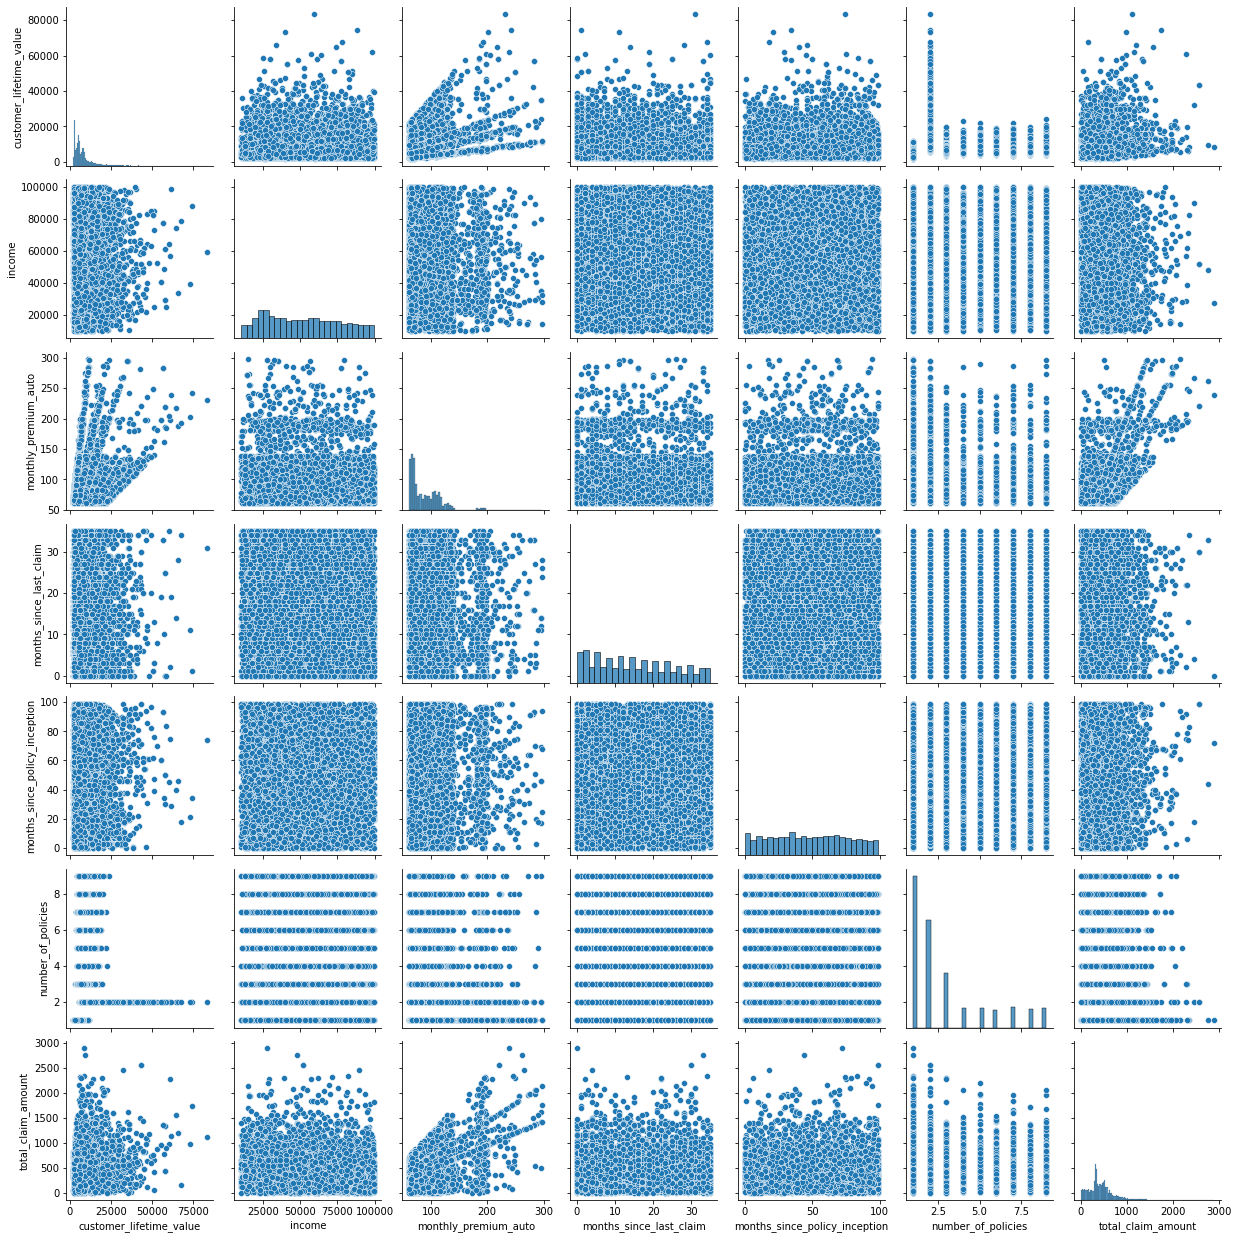

In [49]:
sns.pairplot(ca_numerical)

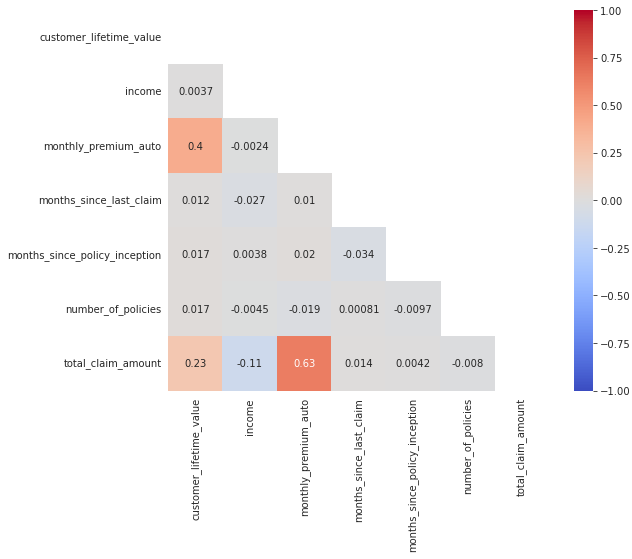

In [50]:
corr = ca_numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [51]:
corr_matrix=ca_numerical.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

[]

- no feature is above 0.8 corrleation thats why we keep all of them


# X-y split
- (y is the target variable, which is the total claim amount)


In [52]:
ca_features_total = pd.concat([ca_numerical, categorical_features], axis=1)

In [53]:
ca_features_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   customer_lifetime_value          10689 non-null  int64 
 1   income                           10689 non-null  int64 
 2   monthly_premium_auto             10689 non-null  int64 
 3   months_since_last_claim          10689 non-null  int64 
 4   months_since_policy_inception    10689 non-null  int64 
 5   number_of_policies               10689 non-null  int64 
 6   total_claim_amount               10689 non-null  int64 
 7   renew_offer_type                 10689 non-null  int64 
 8   number_of_open_complaints        10689 non-null  int64 
 9   region_east                      10689 non-null  uint8 
 10  region_north west                10689 non-null  uint8 
 11  region_west region               10689 non-null  uint8 
 12  response_yes                    

In [54]:
ca_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10689 non-null  int64
 1   income                         10689 non-null  int64
 2   monthly_premium_auto           10689 non-null  int64
 3   months_since_last_claim        10689 non-null  int64
 4   months_since_policy_inception  10689 non-null  int64
 5   number_of_policies             10689 non-null  int64
 6   total_claim_amount             10689 non-null  int64
dtypes: int64(7)
memory usage: 584.7 KB


In [55]:
X=ca_features_total.drop('total_claim_amount', axis=1)
y=ca_features_total.total_claim_amount


In [56]:
X=X._get_numeric_data()

In [57]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,renew_offer_type,number_of_open_complaints,region_east,region_north west,...,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month
0,4809,48029,61,7,52,9,3,0,0,0,...,0,1,0,1,0,1,0,1,2,2
1,2228,92260,64,3,26,1,4,0,0,0,...,0,1,0,0,1,1,0,1,2,1
2,14947,22139,100,34,31,2,3,0,1,0,...,0,1,0,0,1,1,0,1,3,2
3,22332,49078,97,10,3,2,2,0,0,1,...,0,1,0,0,1,1,0,2,2,1
4,9025,23675,117,33,31,7,1,0,0,1,...,0,1,0,1,0,1,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,7,3,0,0,0,...,0,1,0,1,0,1,0,3,3,1
10685,5259,61146,65,7,68,6,2,0,0,1,...,0,1,0,1,0,0,1,1,2,1
10686,23893,39837,201,11,63,2,1,0,0,0,...,0,1,0,1,0,0,0,2,3,2
10687,11971,64195,158,0,27,6,1,4,0,0,...,0,1,0,0,0,0,1,3,2,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff20f096f90>,
      dtype=object)

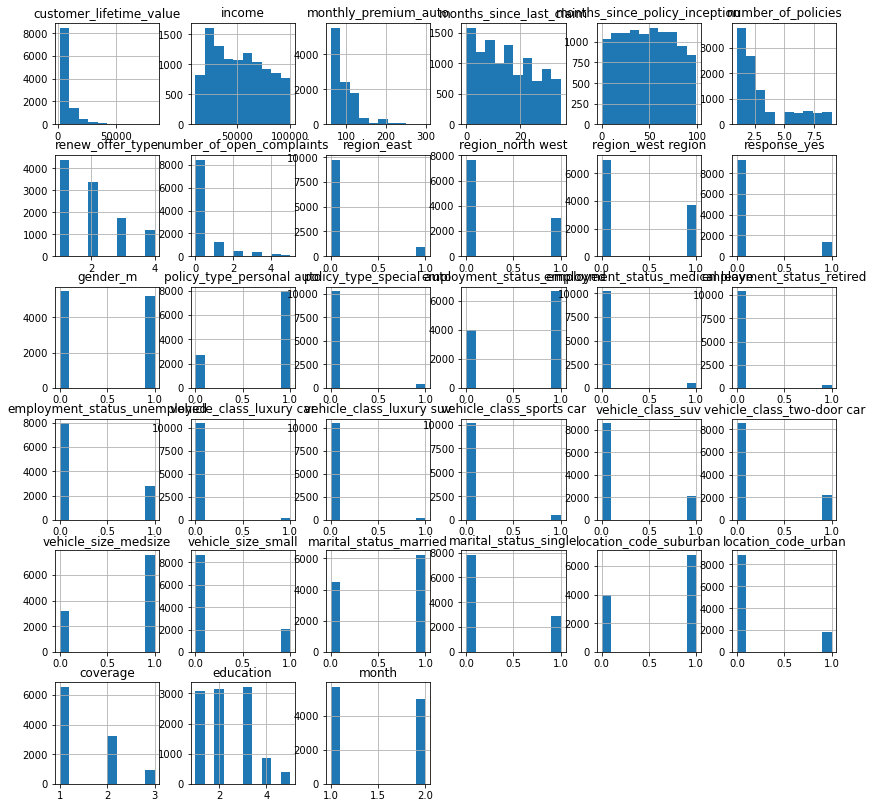

In [58]:
X.hist(figsize=(14,14))

# Train-test split
- Standardize the data (after the data split).

In [59]:
train, test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [60]:
##display the first five rows of the train dataset.
train.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,renew_offer_type,number_of_open_complaints,region_east,region_north west,...,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month
6608,7271,20545,70,23,86,2,3,0,0,1,...,1,1,0,0,1,1,0,1,2,1
5697,5079,70474,68,6,95,5,2,0,0,1,...,1,0,1,1,0,1,0,1,3,1
10524,4428,58577,110,6,62,1,1,0,0,1,...,0,1,0,1,0,0,1,1,1,1
397,22332,49078,97,10,3,2,2,0,0,0,...,1,0,1,0,1,1,0,2,2,1
6324,2430,26182,70,29,30,1,2,0,0,0,...,0,1,0,0,1,1,0,1,2,2


In [61]:
##display the first five rows of the test dataset.
test.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,renew_offer_type,number_of_open_complaints,region_east,region_north west,...,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,marital_status_married,marital_status_single,location_code_suburban,location_code_urban,coverage,education,month
4665,5205,91160,72,18,91,9,1,0,0,1,...,1,1,0,1,0,1,0,1,2,2
4072,2790,28786,71,30,69,1,1,1,0,0,...,0,1,0,1,0,1,0,1,2,1
4549,11981,21514,62,0,59,2,1,0,0,1,...,1,1,0,1,0,0,1,1,4,1
4211,5872,77156,73,30,39,7,1,0,0,0,...,0,0,1,0,0,1,0,1,2,2
3081,9403,56410,117,13,73,3,1,0,0,0,...,0,1,0,1,0,0,1,1,4,1


In [62]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Generate a 'row numbers' column
train['row_num'] = np.arange(len(train))
test['row_num'] = np.arange(len(test))   
#Save the 'Id' column
train_ID = train['row_num']
test_ID = test['row_num']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("row_num", axis = 1, inplace = True)
test.drop("row_num", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping ID feature is : {} ".format(train.shape)) 
print("The test data size after dropping ID feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (7482, 33) 
The test data size before dropping Id feature is : (3207, 33) 

The train data size after dropping ID feature is : (7482, 33) 
The test data size after dropping ID feature is : (3207, 33) 


# Data Processing

## Outliers

Let's explore the outliers

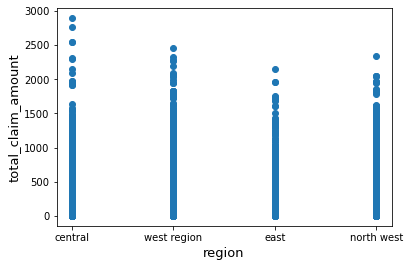

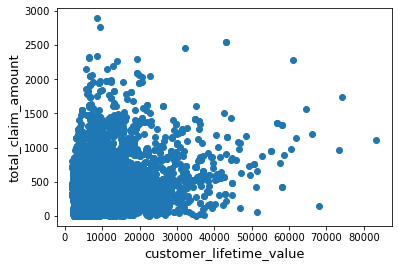

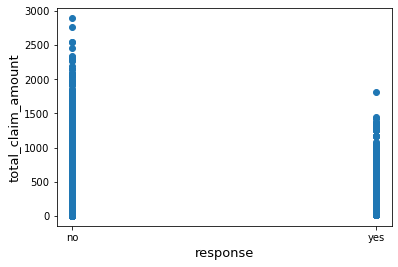

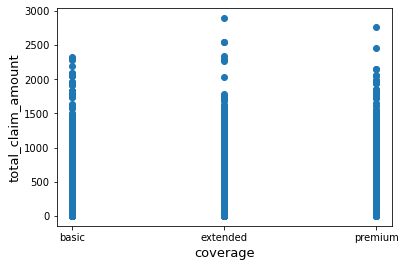

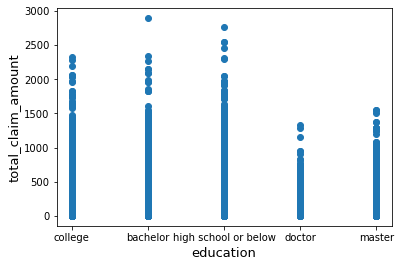

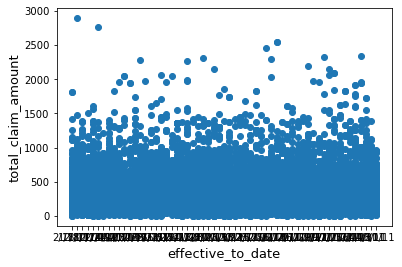

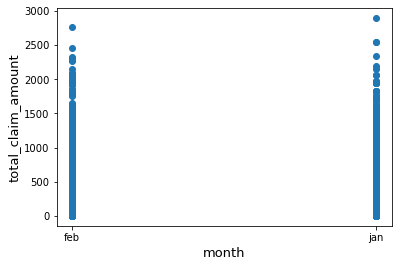

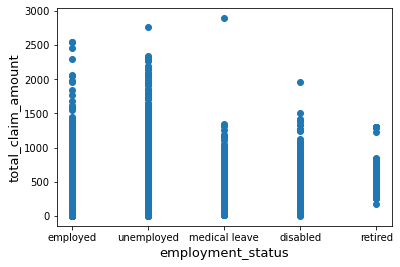

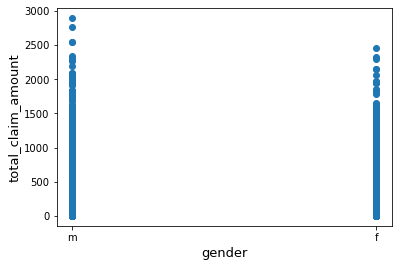

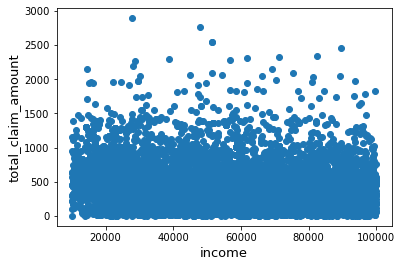

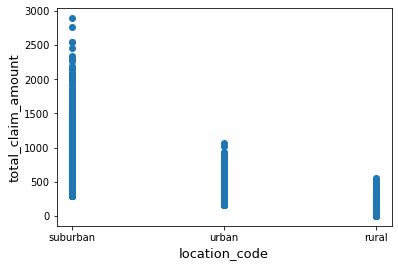

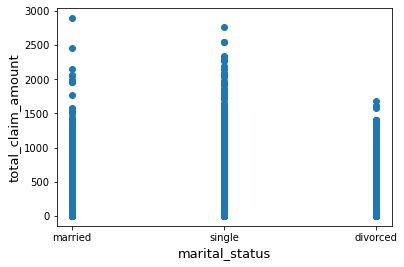

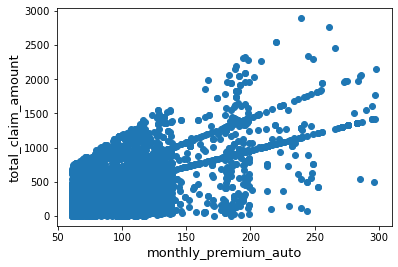

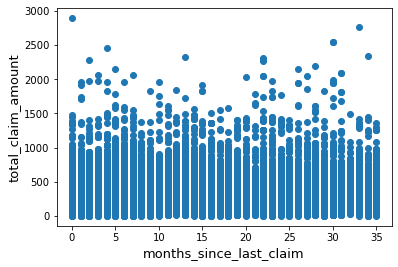

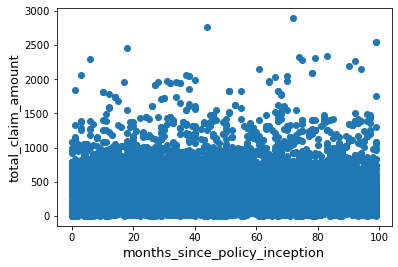

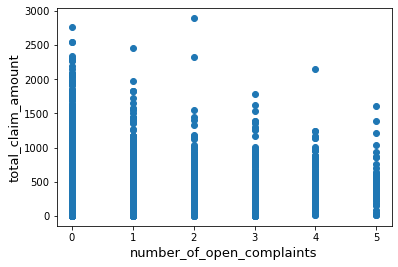

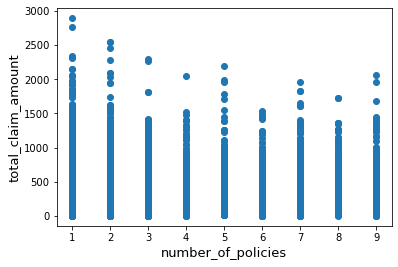

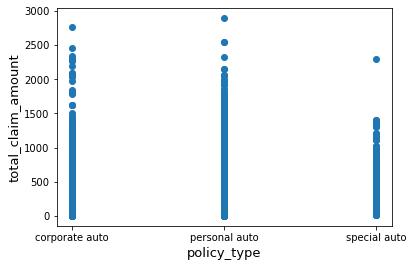

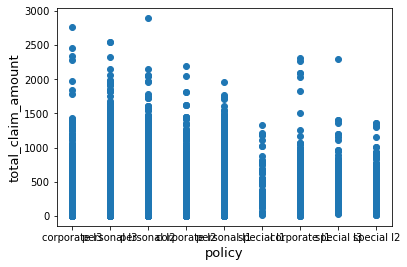

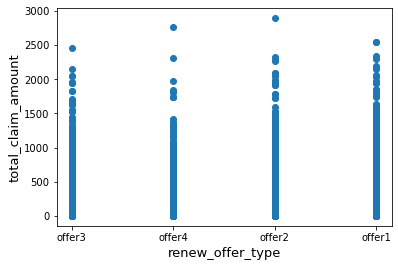

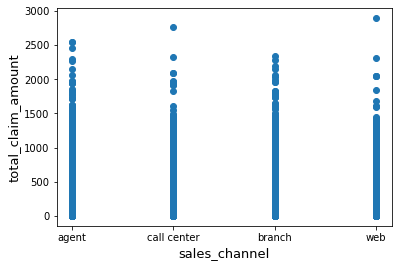

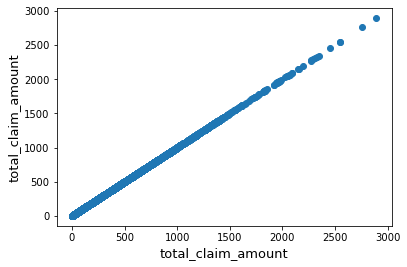

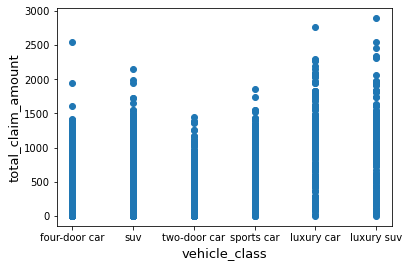

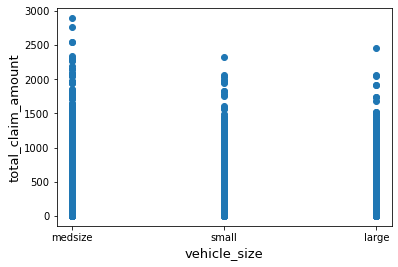

In [63]:
for i in ca_df:
    fig, ax = plt.subplots()
    ax.scatter(x = ca_df[i], y = ca_df['total_claim_amount'])
    plt.ylabel('total_claim_amount', fontsize=13)
    plt.xlabel(i, fontsize=13)
    plt.show()

We can see in the central `region` the upper left two with over-proportional (vs. other regions) large `total claim amount`. These values are still within reason. **Therefore, we can keep them.**

We can see in the that `customer lifetime values` are scattered in reasonable scale. These values are plausible. **Therefore, we can keep them.**

We can see in the that `response` are spread in reasonable scale. These values are plausible. **Therefore, we can keep them.**

We can see in the that `coverage` are spread in reasonable scale. These values are plausible. **Therefore, we can keep them.**

We can see in the that `education` are spread in reasonable scale, expect in the bachelor category. There is a extreme large value at about 3.000 USD. This value is a huge oultlier. <font color='red'>**Therefore, we can safely delete it.**</font>

We can see in the that effective to date are spread in reasonable scale. These values are plausible. **Therefore, we can keep them.**

We can see in the that `coverage` are spread in reasonable scale. These values are plausible. Therefore, we can keep them.

We can see in the that all other `input features` are spread in reasonable scale. These values are all plausible. **Therefore, we can keep them.**

In [64]:
##########STILL WORK ON OUTLIER REMOVAL IN CATEGORICAL INPUT FEATURES##########
#Deleting outliers
#train = train.drop(train[(['education']='bachelor') & (train['total_claim_amount']<2900)].index)

#Check the graphic again
#fig, ax = plt.subplots()
#ax.scatter(train['education'], train['total_claim_amount'])
#plt.ylabel('total_claim_amount', fontsize=13)
#plt.xlabel('education', fontsize=13)
#plt.show()

In [65]:
#Covariance of feature-feature
ca_df.cov()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,4.730080e+07,6.359698e+05,95673.578651,826.332676,3276.537544,-202.643917,277.058840,468500.967493
income,6.359698e+05,6.139519e+08,-2072.932918,-6638.596626,2662.253622,426.330182,-265.254209,-806223.806853
monthly_premium_auto,9.567358e+04,-2.072933e+03,1184.262194,3.483355,18.934276,-0.275978,-1.552770,6344.075320
months_since_last_claim,8.263327e+02,-6.638597e+03,3.483355,101.729615,-9.603563,0.011053,0.019698,40.937785
months_since_policy_inception,3.276538e+03,2.662254e+03,18.934276,-9.603563,780.325120,0.064947,-0.651421,34.208431
number_of_open_complaints,-2.026439e+02,4.263302e+02,-0.275978,0.011053,0.064947,0.828483,-0.000662,-2.840579
number_of_policies,2.770588e+02,-2.652542e+02,-1.552770,0.019698,-0.651421,-0.000662,5.757585,-5.629062
total_claim_amount,4.685010e+05,-8.062238e+05,6344.075320,40.937785,34.208431,-2.840579,-5.629062,85586.016002


**Note :**
Outliers removal is not always safe. We decided to delete less datapoints. There needs to be always a significant justification quantitative and qualitative to remove outliers.

There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data. That's why , instead of removing them all, we will just manage to make some of our models robust on them. You can refer to the modelling part of this notebook for that.

# Target Variable

Total claim amount is the variable we need to predict. So let's do some analysis on this variable first.

/Users/Gunnar/anaconda3/envs/IronhackDA/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 434.23 and sigma = 292.54



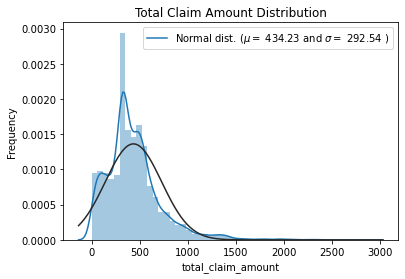

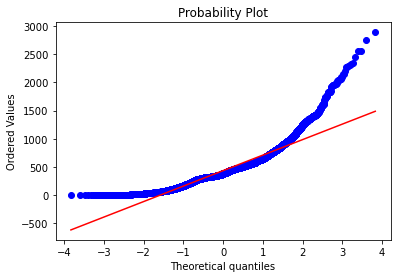

In [66]:
sns.distplot(ca_df['total_claim_amount'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(ca_df['total_claim_amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Total Claim Amount Distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(ca_df['total_claim_amount'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

# Log-transformation of the target variable

/Users/Gunnar/anaconda3/envs/IronhackDA/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 5.79 and sigma = 0.91



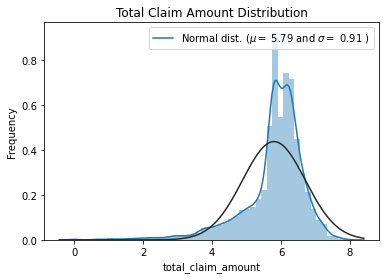

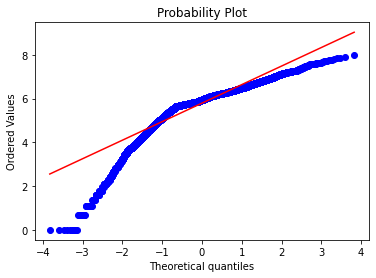

In [67]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
ca_df['total_claim_amount'] = np.log1p(ca_df['total_claim_amount'])

#Check the new distribution 
sns.distplot(ca_df['total_claim_amount'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(ca_df['total_claim_amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Total Claim Amount Distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(ca_df['total_claim_amount'], plot=plt)
plt.show()

The skew seems now corrected and the data appears more normally distributed, except for the left tail.

# Features engineering

Hot/ label encoding was performed above.

#### Skewed features

In [68]:
numeric_feats = ca_df.dtypes[ca_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = ca_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
customer_lifetime_value,3.014652
number_of_open_complaints,2.793077
monthly_premium_auto,2.109878
number_of_policies,1.240585
months_since_last_claim,0.273849
income,0.204790
months_since_policy_inception,0.033469
total_claim_amount,-1.836854


#### Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

Note that setting  λ=0  is equivalent to log1p used above for the target variable.

See [this page](http://onlinestatbook.com/2/transformations/box-cox.html) for more details on Box Cox Transformation as well as [the scipy function's page ](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html)

In [69]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    ca_df[feat] += 1
    ca_df[feat] = boxcox1p(ca_df[feat], lam)
    
ca_df[skewed_features] = np.log1p(ca_df[skewed_features])

There are 8 skewed numerical features to Box Cox transform


# Train-test split after transformation
Standardize the target variable (after the data split).

In [70]:
train, test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

# Modelling

#### Import librairies

In [71]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

We use the **cross_val_score** function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation

In [72]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Base models

- **LASSO Regression** :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's **Robustscaler()** method on pipeline

In [73]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

- **Elastic Net Regression** :
again made robust to outliers

In [74]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

- **Kernel Ridge Regression** :

In [75]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- **Gradient Boosting Regression** :
With **huber loss** that makes it robust to outliers

In [76]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

- **XGBoost** :

In [77]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

- **LightGBM** :

In [78]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### Base models scores¶

Let's see how these base models perform on the data by evaluating the cross-validation rmsle error.

In [79]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 141.9037 (4.7534)



In [80]:
#score = rmsle_cv(ENet)
#print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [81]:
#score = rmsle_cv(KRR)
#print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [82]:
#score = rmsle_cv(GBoost)
#print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [83]:
#score = rmsle_cv(model_xgb)
#print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [84]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] 

### Modeling using Scikit Learn

Model fitting

In [86]:
model_lgb.fit(train, y_train)   # model train

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='regression')

#### Making prediction

In [88]:
y_pred_test=model_lgb.predict(test)   # model prediction

y_pred_train=model_lgb.predict(train)

In [89]:
y_pred_test

array([357.08306416, 370.66635168, 239.339487  , ..., 508.07344737,
        70.75403543, 453.60184608])

In [90]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

## Evaluating Model Performance

In [91]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [92]:
y_pred = y_pred_test

In [93]:
y_pred

array([357.08306416, 370.66635168, 239.339487  , ..., 508.07344737,
        70.75403543, 453.60184608])

In [94]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

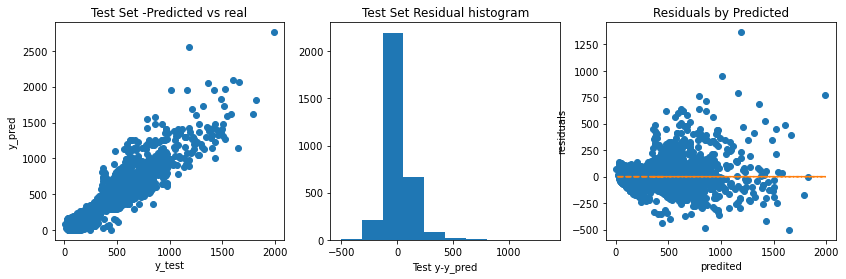

In [95]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

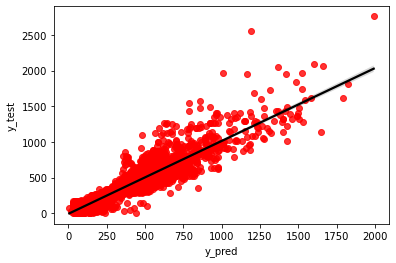

In [96]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

# Benchmark Naive Model (Linear Regression)

In [97]:
std_scaler=StandardScaler().fit(train)   ##. finding the parameters ( mean, variance from the training set )

train_scaled=std_scaler.transform(train)

In [98]:
train.shape

(7482, 33)

In [99]:
test_scaled=std_scaler.transform(test)

In [100]:
print(train_scaled)
print("--------")
print(test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ... -0.73075717 -0.25803541
  -0.94080264]
 [-0.42794064  0.74729478 -0.72925469 ... -0.73075717  0.67463171
  -0.94080264]
 [-0.5223013   0.26592193  0.48489091 ... -0.73075717 -1.19070252
  -0.94080264]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -0.73075717  0.67463171
   1.06292219]
 [ 2.25575772  0.98537142 -0.78707115 ... -0.73075717  0.67463171
  -0.94080264]
 [ 1.18923585  0.68583346 -0.55580532 ... -0.73075717 -0.25803541
  -0.94080264]]
--------
[[-0.40967729  1.58428551 -0.61362178 ... -0.73075717 -0.25803541
   1.06292219]
 [-0.7597249  -0.93947257 -0.64253    ... -0.73075717 -0.25803541
  -0.94080264]
 [ 0.57248529 -1.23371005 -0.90270406 ... -0.73075717  1.60729882
  -0.94080264]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -0.73075717 -0.25803541
  -0.94080264]
 [-0.42547654 -0.97370317 -0.81597938 ... -0.73075717 -0.25803541
  -0.94080264]
 [-0.49881985 -0.95695203  0.71615674 ...  2.30002174 -0.25803541
   1.06292219]]


# Apply Linear Regression

### Modeling using Statsmodels

In [101]:
train_const_scaled = sm.add_constant(train_scaled) # adding a constant

model = sm.OLS(y_train, train_const_scaled).fit()
predictions_train = model.predict(train_const_scaled) 

test_const_scaled = sm.add_constant(test_scaled) # adding a constant
predictions_test = model.predict(test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     754.7
Date:                Fri, 02 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:59:08   Log-Likelihood:                -47649.
No. Observations:                7482   AIC:                         9.537e+04
Df Residuals:                    7448   BIC:                         9.560e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      1.635    264.850      0.0

In [111]:
predictions = predictions_test

In [112]:
rmse = mean_squared_error(abs(y_test), abs(predictions))
print(rmse)
rmsle = np.log(rmse)
print(rmsle)

18641.753016646355
9.83315912977496


### Modeling using Scikit Learn

In [105]:
model=LinearRegression()    # model
model.fit(train_scaled, y_train)   # model train

LinearRegression()

#### model parameters ( b1,b2,b3,b4, ...)

In [106]:
model.coef_

array([-2.63067081e-01, -4.96674616e+00,  1.79137518e+02,  4.38410611e+00,
        1.10163729e-01, -1.28655591e+00,  2.95769284e+00,  1.21952913e+00,
        2.21176755e+00,  1.08936949e-01,  2.13888793e+00, -8.20035698e+00,
        7.97369025e+00, -3.08319342e-01,  1.87196068e+00, -1.59241431e+00,
        4.13034273e+00,  6.15292036e-02,  3.84817934e+01,  4.95716427e+00,
       -1.04006308e+00, -4.69175961e+00, -6.13471738e+00,  1.63728678e-01,
       -3.28158536e+00,  3.48978625e-01, -2.45298530e-01,  3.07640972e+01,
        1.84126572e+02,  8.48045347e+01, -5.67372247e+00, -4.50740676e+00,
        7.82926932e-01])

In [107]:
model.intercept_

433.0597433841219

#### Making prediction

In [108]:
y_pred_test=model.predict(test_scaled)   # model prediction

y_pred_train=model.predict(train_scaled)

In [109]:
y_pred_test

array([461.0572468 , 405.86558342, 137.1723386 , ..., 573.66287889,
       -20.84528896, 465.21664532])

In [110]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

## Evaluating Model Performance

In [ ]:
result=pd.DataFrame({"y_test":y_test,"y_pred":predictions})

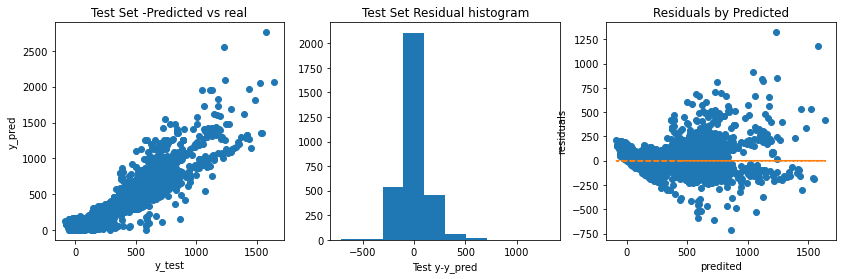

In [117]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(predictions, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - predictions)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(predictions,y_test - predictions,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(predictions,np.zeros(len(predictions)),linestyle='dashed')

more fancy using seaborn

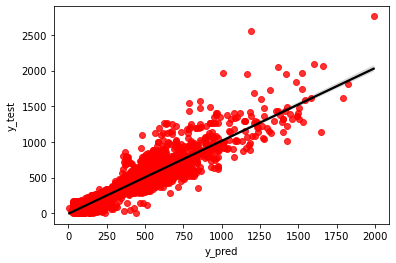

In [118]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [119]:
y_pred = predictions

#### Error metrics

In [120]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

19221.48091039215
96.09856643788541


In [121]:
##prediction on the train set
mse(y_train,y_pred_train)

19912.96554499572

In [122]:
R2=r2_score(y_test,y_pred)
R2

0.7695681198427964

In [123]:
R2_test=model.score(test_scaled,y_test)
R2_train=model.score(train_scaled,y_train)
print(R2_test)
print(R2_train)

0.7695681198427965
0.7697938582150736


In [124]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-test.shape[1]-1)
Adj_R2

0.767171570190988

# Getting the number of parameters & feature contribution to the model

In [125]:
test.shape[1]

33

### Feature Importance¶

In [126]:
features_importances = pd.DataFrame(data={
    'Attribute': train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [127]:
features_importances

,Attribute,Importance
28,location_code_suburban,184.126572
2,monthly_premium_auto,179.137518
29,location_code_urban,84.804535
18,employment_status_unemployed,38.481793
27,marital_status_single,30.764097
11,response_yes,8.200357
12,gender_m,7.973690
22,vehicle_class_suv,6.134717
30,coverage,5.673722
1,income,4.966746


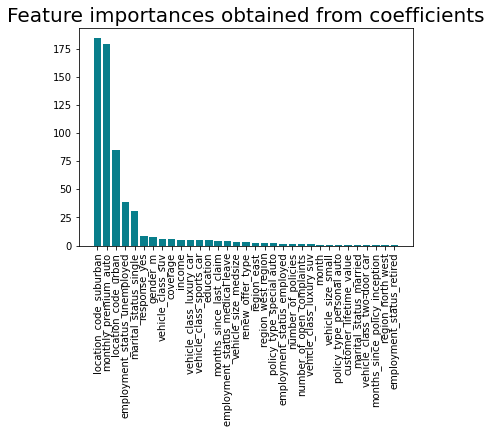

In [128]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Stacking models¶

#### Simplest Stacking approach : Averaging base models

We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse [(inheritance)](https://en.wikipedia.org/wiki/Inheritance_(object-oriented_programming)
